In [344]:
import numpy as np
import pandas as pd
import random  as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [345]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df = [train,test]

In [346]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [347]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- Survived - Survival (0,1)
- Pclass - Ticket class (1,2,3)
- Name
- Sex
- Age
- Sibsp - # of siblings/ spouses
- Parch - # of parents/ children
- Ticket - Ticket number
- Fare
- Cabin
- Embarked - Port of Embarkation (C, Q, S)

Categorical:
- Survived
- Sex
- Emabarked
- Pclass - Ordinal - has a natural order (1st class, 2nd class, 3rd class)

Numerical:

Continous:
- Age
- Fare

Discrete:
- SibSp
- Parch

Alphanumeric: 
- Cabin
- Ticket

In [348]:
train.shape

(891, 12)

In [349]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [350]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- Cabin and age have a lot of null values in both test and train data

In [351]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 38% of people in this training set survived
- Average age is around 30 
- High variation in Fare with highest being $512

In [352]:
train.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- Everyone has unique name in the data
- 577 males present which is around 65%
- Port S is the most used with 644 passengers

#### Survived Column

In [353]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

- Only 342 people survived

#### Pclass column

In [354]:
train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [355]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


- 216 people travelled in class 1 and around 136 survived
- 47% of people with ticket class 2 survived (87 out of 284) and 24% in class 3 survived (119 out of 491)

#### Sex Column

In [356]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [357]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


- 75% of females (233 out of 314) survived
- Only 19% of men (109 out of 577) survived

#### Age Column

<AxesSubplot:xlabel='Age', ylabel='Count'>

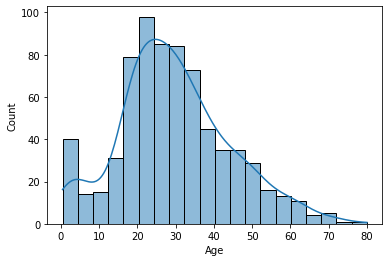

In [358]:
sns.histplot(train["Age"],kde=True)

Text(0.5, 1.0, 'Survived')

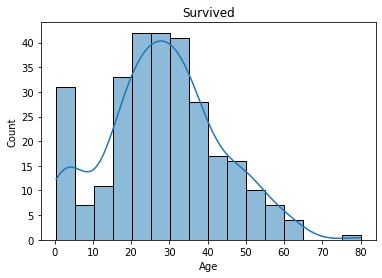

In [359]:
sns.histplot(train[train["Survived"]==1]["Age"],kde=True)
plt.title("Survived")

Text(0.5, 1.0, 'Not Survived')

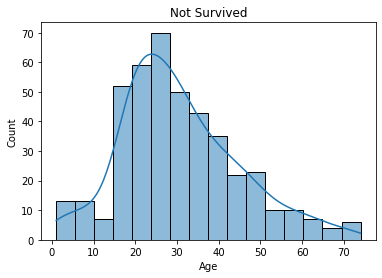

In [360]:
sns.histplot(train[train["Survived"]==0]["Age"],kde=True)
plt.title("Not Survived")

In [361]:
x = np.round(np.mean(train[train["Survived"]==1]["Age"]),2)
y = np.round(np.mean(train[train["Survived"]==0]["Age"]),2)
print("The mean age of people who survived is: {}".format(x))
print("The mean age of people who did not survive is: {}".format(y))

The mean age of people who survived is: 28.34
The mean age of people who did not survive is: 30.63


- It can be observed that a lot of younger people survive (probably because they were given the opportunity)
- The count to kids between age of 0 and 5 had a higher survival rate
- Oldest person aged 80 survived

#### SibSp Column

In [362]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [363]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


- Around 70% people (608) did not travel with sibling or spouse
- People with 1 sibling or spouse had a higher chance of surviving

#### Parch Column

In [364]:
train["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [365]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


- Majority of people did not travel with parents or children
- People who travlled with either 1, 2 or 3 children or parents had a more than 50% chance of survival

#### Fare Column

<AxesSubplot:xlabel='Fare', ylabel='Count'>

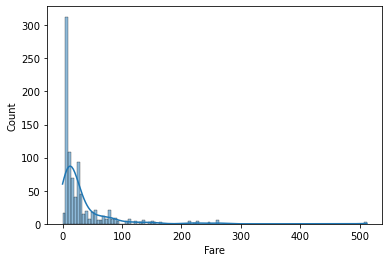

In [366]:
sns.histplot(train["Fare"],kde=True)

Text(0.5, 1.0, 'Survived')

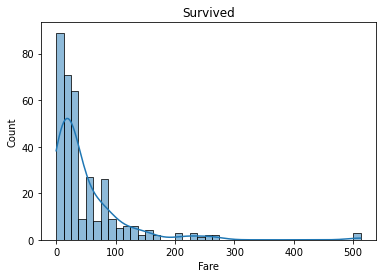

In [367]:
sns.histplot(train[train["Survived"]==1]["Fare"],kde=True)
plt.title("Survived")

Text(0.5, 1.0, 'Not Survived')

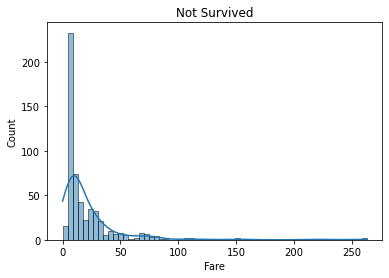

In [368]:
sns.histplot(train[train["Survived"]==0]["Fare"],kde=True)
plt.title("Not Survived")

In [369]:
x = np.round(np.mean(train[train["Survived"]==1]["Fare"]),2)
y = np.round(np.mean(train[train["Survived"]==0]["Fare"]),2)
print("The mean fare of people who survived is: {}".format(x))
print("The mean fare of people who did not survive is: {}".format(y))

The mean fare of people who survived is: 48.4
The mean fare of people who did not survive is: 22.12


- Majority of the people who did not survive had a smaller fare compared to the ones who survived on average

#### Embarked Column

In [370]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [371]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


- Majority of the people boarded from the port S however they had the smallest survival rate
- People who boarded from port C had the biggest survival rate (greater than 55%)

<AxesSubplot:>

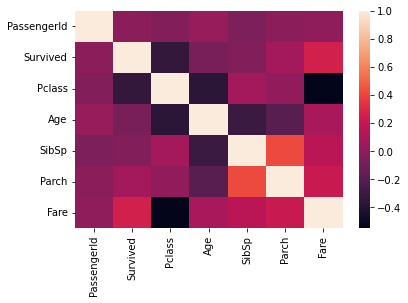

In [372]:
sns.heatmap(train.corr())

Decision so far:
- keep PClass, Sex, Age, SibSp, Parch, Fare, Embarked
- drop Cabin and Ticket

In [373]:
train = train.drop(["Ticket", "Cabin"],axis=1)
test = test.drop(["Ticket", "Cabin"],axis=1)
df = [train,test]

In [374]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [375]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


- The names are not required so we can only extract the titles from the names

In [376]:
for dataset in df:
    dataset["Title"] = dataset.Name.str.extract(" ([A-Za-z]+)\.",expand=False)

pd.crosstab(train["Title"],train["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


- Majority of people had title Master, Miss, Mr, and Mrs
- Mlle is Miss, Mme is Mrs, Ms is Miss
- Rest we can declare as Rare

In [377]:
for dataset in df:
    dataset["Title"] = dataset["Title"].replace(["Lady", "Capt", "Col", "Countess", "Don", "Dr", "Jonkheer","Major","Rev","Sir"],"Rare")
    dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")
    dataset["Title"] = dataset["Title"].replace("Ms", "Miss")

train[["Title","Survived"]].groupby(["Title"],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


- We can say that title of the person has a effect on their Survival Rate
- People with title Mr. had least survival rate

In [378]:
train = train.drop(["Name","PassengerId"],axis=1)
test = test.drop(["Name"],axis=1)
df = [train,test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


#### Categorical features with strings to numerical

In [379]:
for dataset in df:
    dataset["Sex"] = dataset["Sex"].map({"female":0,"male":1}).astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,Mr
1,1,1,0,38.0,1,0,71.2833,C,Mrs
2,1,3,0,26.0,0,0,7.9250,S,Miss
3,1,1,0,35.0,1,0,53.1000,S,Mrs
4,0,3,1,35.0,0,0,8.0500,S,Mr


In [380]:
for dataset in df:
    dataset["Title"] = dataset["Title"].map({"Master":0,"Miss":1, "Mrs":2, "Mr":3,"Rare":4})
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,S,3
1,1,1,0,38.0,1,0,71.2833,C,2
2,1,3,0,26.0,0,0,7.9250,S,1
3,1,1,0,35.0,1,0,53.1000,S,2
4,0,3,1,35.0,0,0,8.0500,S,3


In [381]:
for dataset in df:
    dataset['Embarked'] = dataset['Embarked'].fillna("S") # as S is the most used port

for dataset in df:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,0,3
1,1,1,0,38.0,1,0,71.2833,1,2
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,2
4,0,3,1,35.0,0,0,8.0500,0,3


#### Estimate and fill missing values

In [382]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
 8   Title     891 non-null    int64  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


- Only Age column has missing values now

<AxesSubplot:>

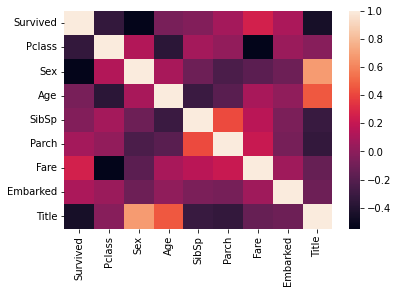

In [383]:
sns.heatmap(train.corr())

- One way to estimate age is to fill it with median values
- another way is to get median value based on its PClass and Sex
- So we can get the median age for each of the PClass and Sex ((Male,1), (Male,2), (Male,3), (FeMale,1), (FeMale,2), (FeMale,3)) and then replace the na values

In [384]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [385]:
for dataset in df:
    for i in range(0,2):
        for j in range(1,4):
            guess_df = dataset[(dataset["Sex"]==i) & (dataset["Pclass"] == j)]["Age"].dropna()

            age_guess = guess_df.median()
            # Convert age_guess float to nearest .5 age
            guess_ages[i,j-1] = int( age_guess/0.5 + 0.5 ) * 0.5
    for i in range(0,2):
        for j in range(1,4):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j), "Age"] = guess_ages[i,j-1]

    dataset["Age"] = dataset["Age"].astype(int)

In [386]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22,1,0,7.2500,0,3
1,1,1,0,38,1,0,71.2833,1,2
2,1,3,0,26,0,0,7.9250,0,1
3,1,1,0,35,1,0,53.1000,0,2
4,0,3,1,35,0,0,8.0500,0,3


In [387]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
 8   Title     891 non-null    int64  
dtypes: float64(1), int32(3), int64(5)
memory usage: 52.3 KB


- No null value remaining

- We can check the survival rate of the range of ages

In [388]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


- Kids upto the age of 16 had the highest survival rate
- It is a good idea that we create age as an ordinal column (0-16 as 0, 16-32 as 1 and so on)

In [389]:
for dataset in df:
    dataset.loc[dataset["Age"]<=16,"Age"] = 0
    dataset.loc[(dataset["Age"]>16) & (dataset["Age"]<=32),"Age"] = 1
    dataset.loc[(dataset["Age"]>32) & (dataset["Age"]<=48),"Age"] = 2
    dataset.loc[(dataset["Age"]>48) & (dataset["Age"]<=64),"Age"] = 3
    dataset.loc[dataset["Age"]>64,"Age"] = 4
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,1,1,1,0,7.2500,0,3,"(16.0, 32.0]"
1,1,1,0,2,1,0,71.2833,1,2,"(32.0, 48.0]"
2,1,3,0,1,0,0,7.9250,0,1,"(16.0, 32.0]"
3,1,1,0,2,1,0,53.1000,0,2,"(32.0, 48.0]"
4,0,3,1,2,0,0,8.0500,0,3,"(32.0, 48.0]"


In [390]:
train = train.drop("AgeBand",axis=1)
df = [train,test]

In [391]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1,1,0,7.2500,0,3
1,1,1,0,2,1,0,71.2833,1,2
2,1,3,0,1,0,0,7.9250,0,1
3,1,1,0,2,1,0,53.1000,0,2
4,0,3,1,2,0,0,8.0500,0,3


##### Creating a new varible (FamilySize) so that we can drop SibSp and Parch

In [392]:
for dataset in df:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1 # +1 to include themselves

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


- We can say that family size is not really important for survival
- Important variable can be IsAlone

In [393]:
for dataset in df:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


- IsAlone can be an important factor for the prediction of survival
- Drop FamilySize, SibSp, Parch

In [394]:
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
df = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,1,7.2500,0,3,0
1,1,1,0,2,71.2833,1,2,0
2,1,3,0,1,7.9250,0,1,1
3,1,1,0,2,53.1000,0,2,0
4,0,3,1,2,8.0500,0,3,1


Combine Age and Pclass

In [395]:
for dataset in df:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,1,1,7.2500,0,3,0,3
1,1,1,0,2,71.2833,1,2,0,2
2,1,3,0,1,7.9250,0,1,1,3
3,1,1,0,2,53.1000,0,2,0,2
4,0,3,1,2,8.0500,0,3,1,6


In [396]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    int32  
 4   Fare         417 non-null    float64
 5   Embarked     418 non-null    int32  
 6   Title        417 non-null    float64
 7   IsAlone      418 non-null    int64  
 8   Age*Class    418 non-null    int64  
dtypes: float64(2), int32(3), int64(4)
memory usage: 24.6 KB


- Fare has a missing value in test data so we can replace it by median (since it is only one value)

In [397]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    int32  
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int32  
 6   Title        417 non-null    float64
 7   IsAlone      418 non-null    int64  
 8   Age*Class    418 non-null    int64  
dtypes: float64(2), int32(3), int64(4)
memory usage: 24.6 KB


- We can do the same thing for Fare as we did for Age (create bands and then convert to ordinal variable)

In [398]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [399]:
for dataset in df:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]

In [400]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,1,1,0,0,3,0,3
1,1,1,0,2,3,1,2,0,2
2,1,3,0,1,1,0,1,1,3
3,1,1,0,2,3,0,2,0,2
4,0,3,1,2,1,0,3,1,6
5,0,3,1,1,1,2,3,1,3
6,0,1,1,3,3,0,3,1,3
7,0,3,1,0,2,0,0,0,0
8,1,3,0,1,1,0,2,0,3
9,1,2,0,0,2,1,2,0,0


In [401]:
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,1,2,0,2,3.0,1,6
1,893,3,0,2,0,0,2.0,0,6
2,894,2,1,3,1,2,3.0,1,6
3,895,3,1,1,1,0,3.0,1,3
4,896,3,0,1,1,0,2.0,0,3
5,897,3,1,0,1,0,3.0,1,0
6,898,3,0,1,0,2,1.0,1,3
7,899,2,1,1,2,0,3.0,0,2
8,900,3,0,1,0,1,2.0,1,3
9,901,3,1,1,2,0,3.0,0,3


In [404]:
test["Title"] = test["Title"].fillna(5)
test["Title"] = test["Title"].astype(int)
test.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,1,2,0,2,3,1,6
1,893,3,0,2,0,0,2,0,6
2,894,2,1,3,1,2,3,1,6
3,895,3,1,1,1,0,3,1,3
4,896,3,0,1,1,0,2,0,3
5,897,3,1,0,1,0,3,1,0
6,898,3,0,1,0,2,1,1,3
7,899,2,1,1,2,0,3,0,2
8,900,3,0,1,0,1,2,1,3
9,901,3,1,1,2,0,3,0,3


Pclass - 1, 2, 3

Sex - 0 Female, 1 Male

Age - 0 0-16, 1 16-32, 2 32-48, 3 48-64, 4 64-end

Fare - 0 0-7.91, 1 7.91-14.454, 2 14.454-31, 3 31-512.329

Embarked - 0 S, 1 C, 2 Q

Title - 0 Master, 1 Miss, 2 Mrs, 3 Mr, 4 Rare

IsAlone - 0 No, 1 Yes